In [171]:
import numpy as np

sample_freq = 8000           # サンプリング周波数
cutoff_freq = 1000           # 遮断周波数（カットオフ周波数）(Hz)
N = 11                       # インパルス応答の個数
T = 1/sample_freq            # 周期
g_delay = T * ((N-1) / 2)   # 群遅延
alpha = 0.540               # ハミング窓

omega_c = 2 * np.pi * cutoff_freq

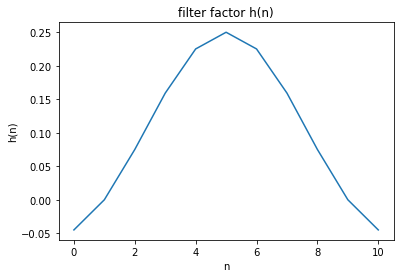

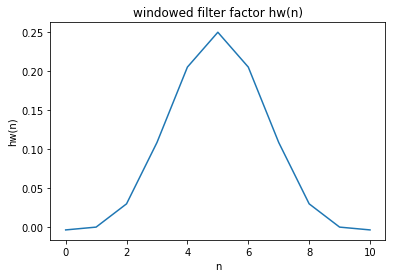

In [172]:
abs_N = N + int(g_delay)
hw = [0] * abs_N
w = [0] * abs_N
h = [0] * abs_N

for i in range(int(g_delay), abs_N, 1):
    # 一般化ハミング窓の計算
    w[i] = alpha + ((1-alpha) * np.cos((2*np.pi*(i-(g_delay/T))) / (N-1)))
    
    # フィルタ係数の計算
    # 分母が0になる場合, sin(x)/x = 1 (x -> 0)を利用して計算
    if np.pi*(i-(g_delay/T)) == 0.0:
        h[i] = (omega_c*T) / np.pi
    else:
        h[i] = np.sin((i-(g_delay/T))*omega_c*T) / (np.pi*(i-(g_delay/T)))
    # 窓関数がかかったフィルタ係数hw(n)を計算
    hw[i] = w[i] * h[i]

plt.title('filter factor h(n)')
plt.xlabel('n')
plt.ylabel('h(n)')
plt.plot(h)
plt.show()
    
plt.title('windowed filter factor hw(n)')
plt.xlabel('n')
plt.ylabel('hw(n)')
plt.plot(hw)
plt.show()

In [173]:
# カラーのセンサデータを読み込む
import pandas as pd

with open('ev3_SampleData.csv') as f:
    f.read()

df = pd.read_csv('ev3_SampleData.csv', index_col=0, header=0)

print(type(df))
print(df.head())

<class 'pandas.core.frame.DataFrame'>
    color  turn      p         i       d
id                                      
1      21    -9 -0.324 -0.001050 -9.1125
2      21     0 -0.324 -0.003149  0.0000
3      21     0 -0.324 -0.005249  0.0000
4      21     0 -0.324 -0.007348  0.0000
5      21     0 -0.324 -0.009448  0.0000


In [174]:
# 4msごとにcolorを取得しているので、
# 4msごとのcolorの値を見るためのDataFrameを作成

df_color_4ms = pd.DataFrame({
    'time' : range(0, len(df)*4, 4),
    'color' : df.iloc[:, 0]
})
print(df_color_4ms.head())

    time  color
id             
1      0     21
2      4     21
3      8     21
4     12     21
5     16     21


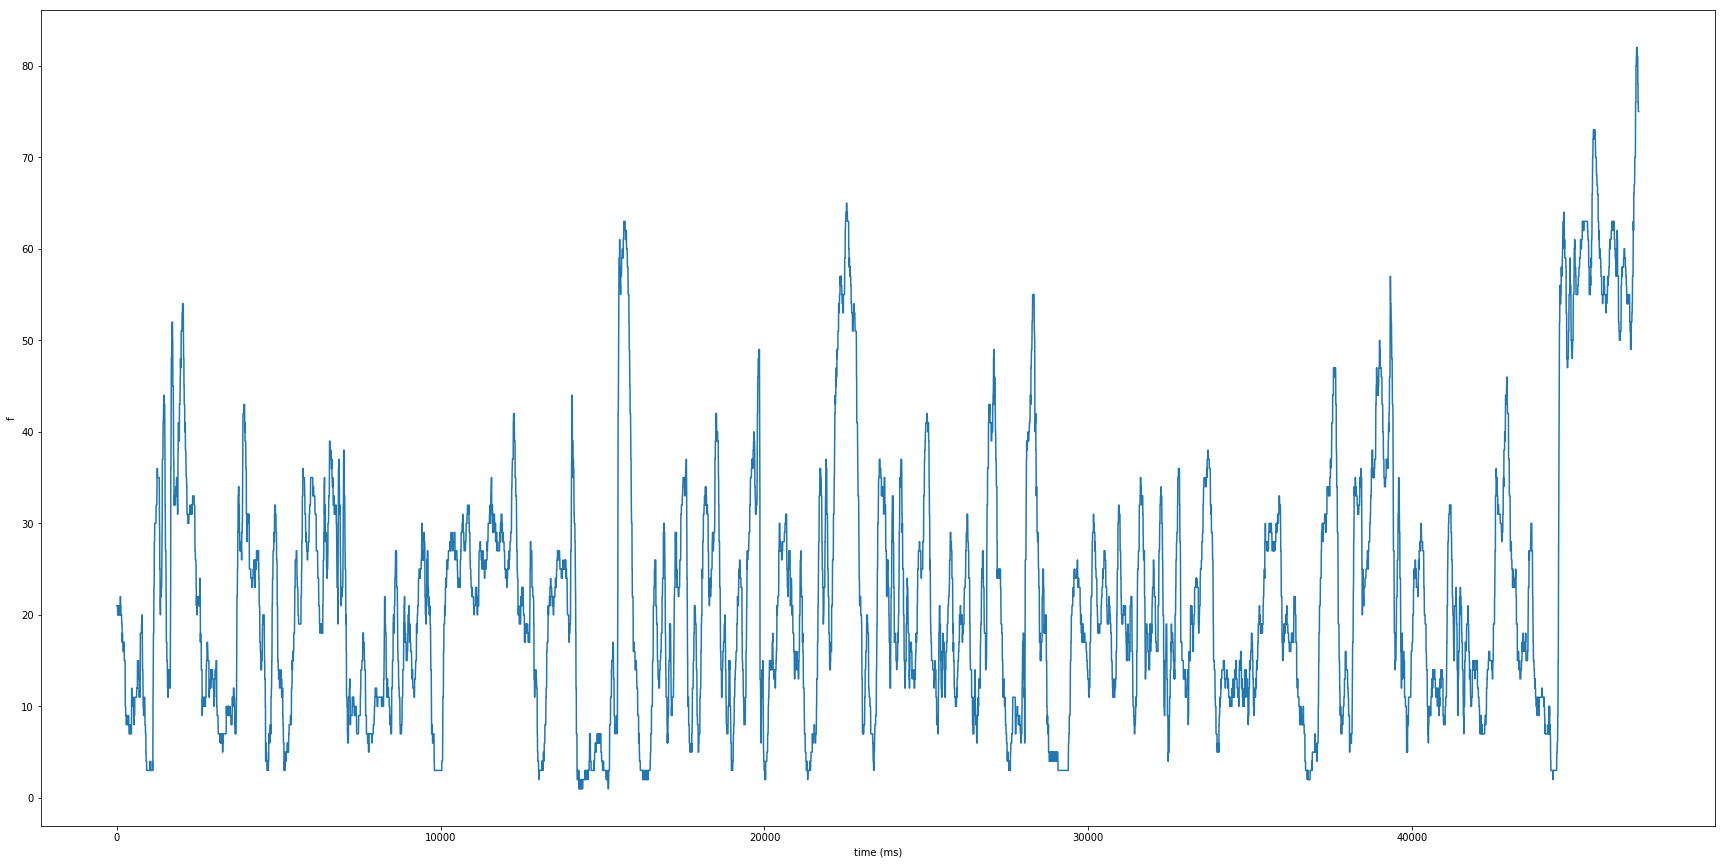

In [175]:
# プロット
import matplotlib.pyplot as plt
f = np.array(df_color_4ms.iloc[:, 1].values.flatten())
t = range(0, len(f)*4, 4)

# 生のカラーデータをプロット
# plt.figure(figsize=(100,50), dpi=200)
plt.figure(figsize=(30, 15))
plt.plot(t, f)
plt.xlabel("time (ms)")
plt.ylabel("f")
plt.show()

121
11
N= 11


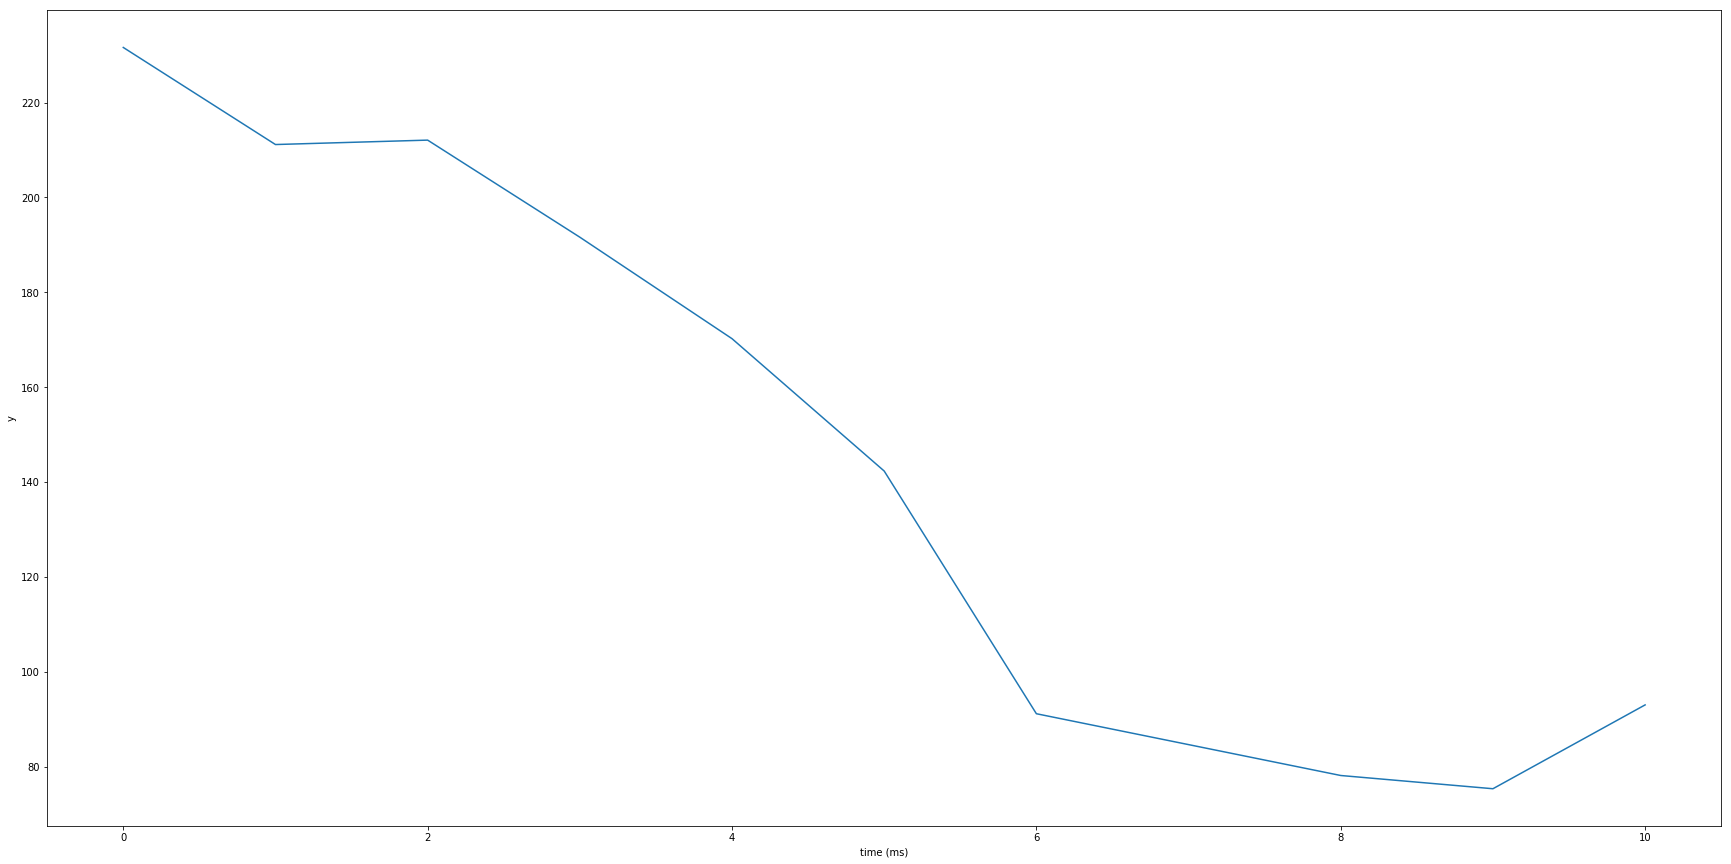

In [176]:
# 最初の11個（f[0] ~ f[10]）の場合(おためし)
fc = f[0:121]
y = [0] * int(len(fc)/N)
k = int(0)
g_delay = g_delay / T
    
print(len(fc))
print(len(y))
print('N=', N)
    
for i in range(0, len(fc), 1):
    for j in range(0, N, 1):
#         print('i=', i, ' j=', j, ' k=', k, ' i%N=', i%N)
        # 生データにフィルタ係数をかける
        y[k] += fc[i] * hw[j]
    
    if i != 0 and i % N == 0:
        k += 1

# 時系列データ
t = range(0, len(y), 1)
plt.figure(figsize=(30, 15))
plt.plot(t, y)
plt.xlabel("time (ms)")
plt.ylabel("y")
plt.show()

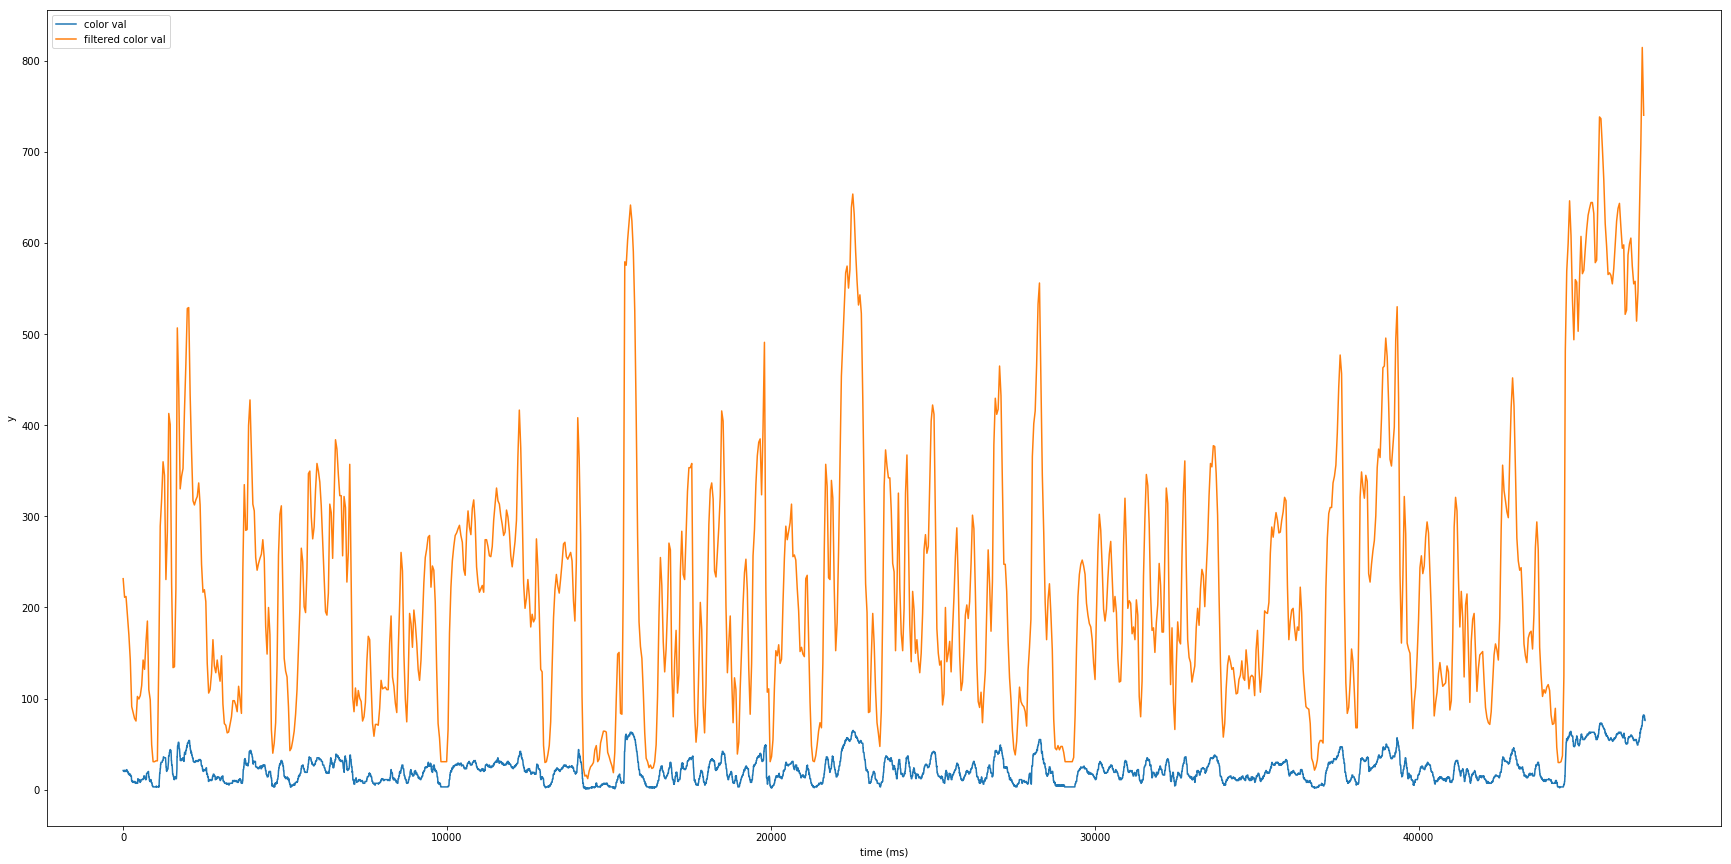

In [177]:
# fのデータ数をNの倍数にする(len(f) = )ための加工
f = np.array(df_color_4ms.iloc[:, 1].values.flatten())
index = [len(f)-4, len(f)-3, len(f)-2, len(f)-1]
f = np.delete(f, index)
y = [0] * int(len(f)/N)
k = int(0)
g_delay = g_delay / T

for i in range(0, len(f), 1):
    for j in range(0, N, 1):
#         print('i=', i, ' j=', j, ' k=', k, ' i%N=', i%N)
        # 生データにフィルタ係数をかける
        y[k] += f[i] * hw[j]
    
    if i != 0 and i % N == 0:
        k += 1

# 生データとフィルタ後のデータをプロット
t1 = range(0, len(f)*4, 4)
t2 = range(0, len(y)*44, 44)
plt.figure(figsize=(30, 15))
plt.plot(t1, f, label='color val')
plt.plot(t2, y, label='filtered color val')
plt.xlabel("time (ms)")
plt.ylabel("y")
plt.legend(loc = 'upper left')
plt.show()

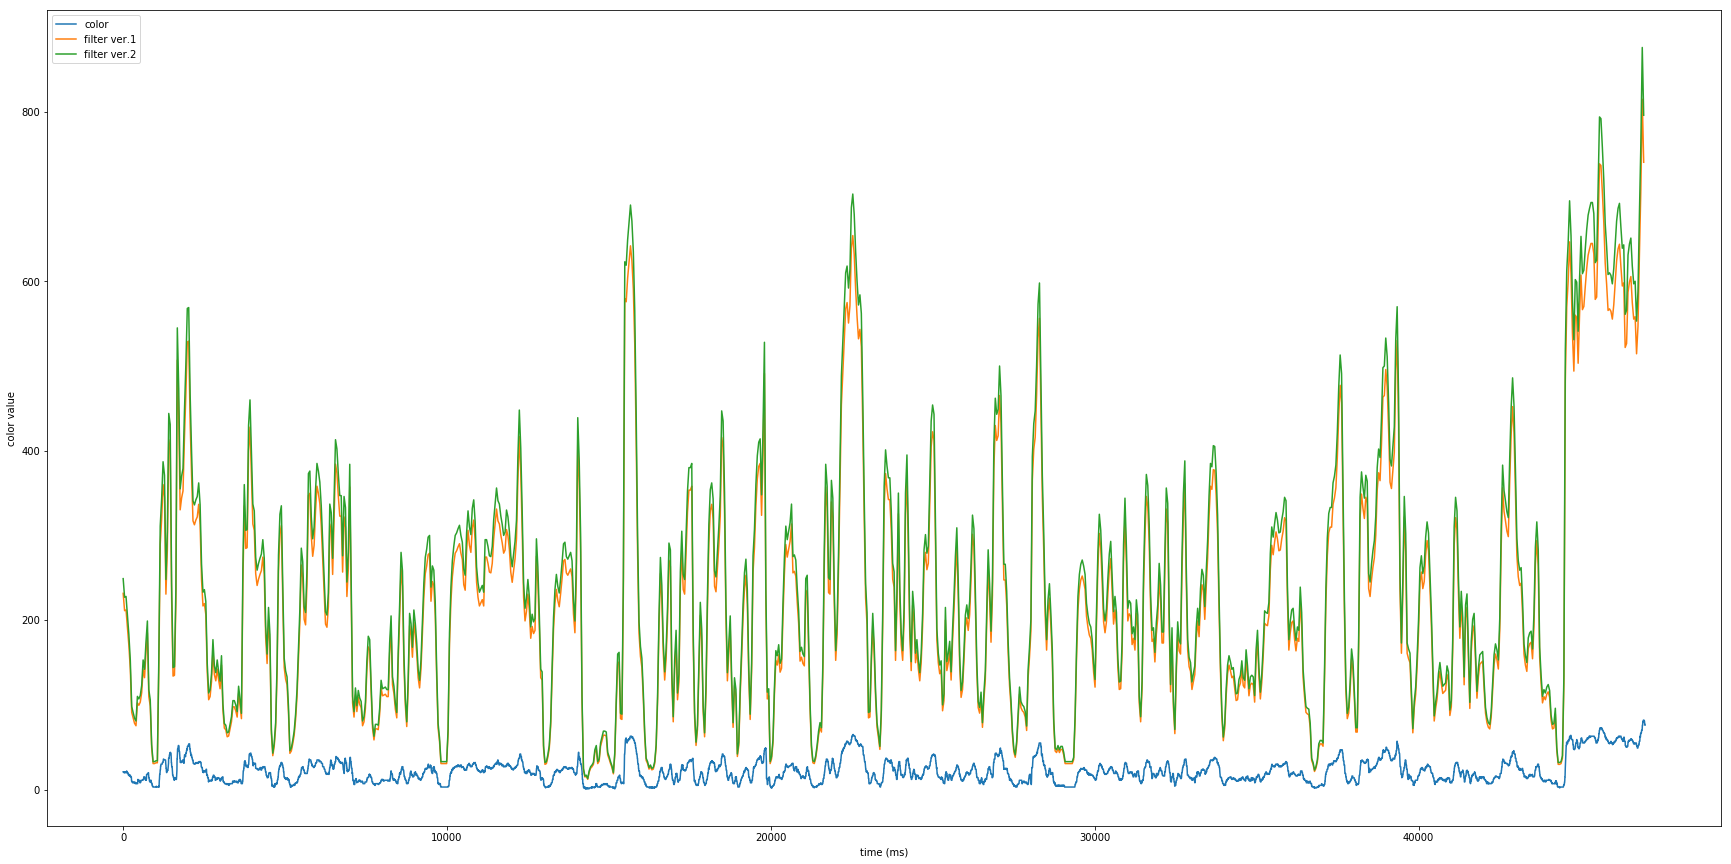

In [178]:
fir = [0.0000, -0.0072, -0.0215, 0.0612, 0.2738, 0.3874, 0.2738, 0.0612, -0.0215, -0.0072, 0.0000]
k = int(0)
y2 = [0] * int(len(f)/N)

for i in range(0, len(f), 1):
    for j in range(0, N, 1):
        # 生データにフィルタ係数をかける
        y2[k] += f[i] * fir[j]
    
    if i != 0 and i % N == 0:
        k += 1

# 生データと2つのフィルタ後のデータをプロット
t1 = range(0, len(f)*4, 4)
t2 = range(0, len(y)*44, 44)
plt.figure(figsize=(30, 15))
plt.plot(t1, f, label='color')
plt.plot(t2, y, label='filter ver.1')
plt.plot(t2, y2, label='filter ver.2')
plt.xlabel("time (ms)")
plt.ylabel("color value")
plt.legend(loc = 'upper left')
plt.show()

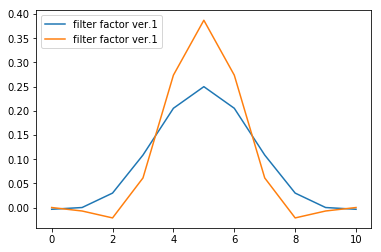

In [180]:
fir = [0.0000, -0.0072, -0.0215, 0.0612, 0.2738, 0.3874, 0.2738, 0.0612, -0.0215, -0.0072, 0.0000]
plt.plot(range(0, N, 1), hw, label='filter factor ver.1')
plt.plot(range(0, len(fir), 1), fir, label='filter factor ver.1')
plt.legend(loc = 'upper left')
plt.show()